<small><i>**Autores**: Jeison Mauricio Alarcón Becerra y Óscar Fabián Arévalo Sandoval ([Web del proyecto](https://github.com/JeisonAlarcon/ProyectoMineria))
  </i><br>
  <i>**Adaptación de los artículos**: [Image-to-Image Translation with Conditional Adversarial Networks](https://arxiv.org/pdf/1611.07004.pdf), [Enhanced Deep Residual Networks for Single Image Super-Resolution](https://arxiv.org/pdf/1707.02921.pdf) y [3D Photography using Context-aware Layered Depth Inpainting](https://drive.google.com/file/d/17ki_YAL1k5CaHHP3pIBFWvw-ztF4CCPP/view)
  </i>


<br>

  + 🔰 **¡Importante!** Para que la ejecución no se demore más de lo que debería, comprueba en la pestaña <b>"Entorno de ejecución" > "Cambiar tipo de entorno de ejecución"</b> que en el menú desplegable <b>"Acelerador por hardware"</b> está $\text{GPU}$ seleccionado.
  + 📍 Recuerde que normalmente la ejecución de estos algoritmos requeriría contar con un equipo informático potente *(una buena GPU, memoria, etc)*, pero en este caso no es necesario, pues estaremos utilizando $\text{Google Colab}$, el cual se encargará de todo esto.
</small>
___
___

# ✅**GENERANDO IMÁGENES REALISTAS CON $\texttt{Pix2Pix}$**💯

El siguiente cuaderno muestra la puesta en marcha de <u>Image to Image utilizando GAN’s condicionales</u>. Con esta técnica se puede lograr diversos resultados (❗*las aplicaciones son $\infty$*❗) como colorear fotos en blanco y negro, convertir mapas de Google a Google Earth, convertir las fachadas de los edificios en edificios reales, etc. Aquí realizaremos la creación de imágenes realistas de 🌷🌹flores🌼🌻 y 🐠🦎pokémones🦑🦕.

> Tenga presente que cada época toma alrededor de $45$ segundos ⏳ en una sola 🖥️GPU V100💻.

A continuación, se muestra el resultado generado después de entrenar el modelo durante $800$ épocas.

___

## 📄 *Resumen del artículo [Image-to-Image Translation with Conditional Adversarial Networks](https://arxiv.org/pdf/1611.07004.pdf)* 📑

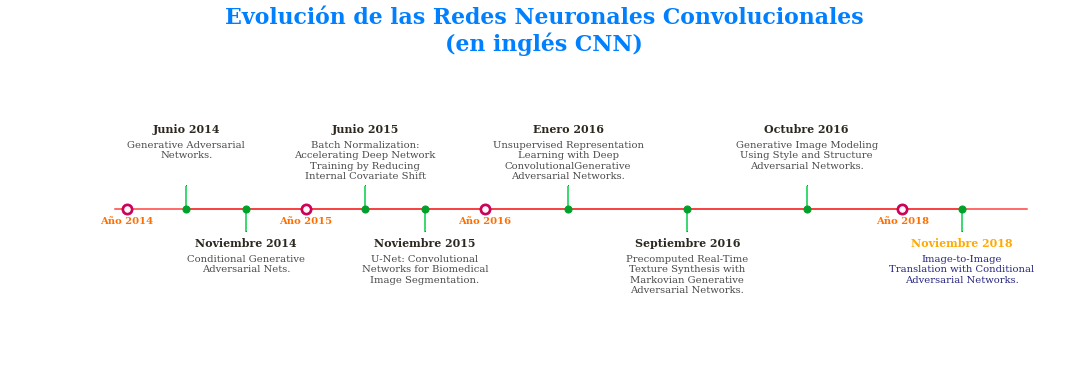

In [ ]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

tl_x   = [1, 2.5, 4, 7.5]
Fechas = ["Año 2014", "Año 2015", "Año 2016", "Año 2018"]

tl_sub_x     = [1.5, 2, 3, 3.5, 4.7, 5.7, 6.7, 8]
tl_sub_times = ["Junio 2014", "Noviembre 2014", "Junio 2015", "Noviembre 2015",
                "Enero 2016", "Septiembre 2016", "Octubre 2016", "Noviembre 2018"
               ]
tl_text = ["Generative Adversarial\nNetworks.",
           "Conditional Generative\nAdversarial Nets.",
           "Batch Normalization:\nAccelerating Deep Network\nTraining by Reducing\nInternal Covariate Shift", 
           "U-Net: Convolutional\nNetworks for Biomedical\nImage Segmentation.",
           "Unsupervised Representation\nLearning with Deep\nConvolutionalGenerative\nAdversarial Networks.",
           "Precomputed Real-Time\nTexture Synthesis with\nMarkovian Generative\nAdversarial Networks.", # Inicios de PatchGAN
           "Generative Image Modeling\nUsing Style and Structure\nAdversarial Networks.",                # PatchGAN
           "Image-to-Image\nTranslation with Conditional\nAdversarial Networks."
          ]

# Set figure & Axes
fig, ax = plt.subplots(figsize = (15, 5), constrained_layout = True)
ax.set_ylim(-2, 2), ax.set_xlim(0, 9)

# Línea de Tiempo : Línea
ax.axhline(0, xmin = 0.1, xmax = 0.95, c = "#FF3D3D", zorder = 1)
# Línea de Tiempo : Puntos Fecha
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 120, c = "#CC0056", zorder = 2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 30,  c = "#FAFAFA", zorder = 3)
# Línea de Tiempo : Puntos Sucesos
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s = 50, c = "#00A12B", zorder = 4)

# Texto Fechas
for x, date in zip(tl_x, Fechas):
    ax.text(x, -0.2, date, ha = "center", fontfamily = "serif", fontweight = "bold", color = "#FF6F00")
# Stemplot : Líneas Verticales
levels = np.zeros(len(tl_sub_x))    
levels[::2]  = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection = True)
plt.setp(baseline, zorder = 0)
plt.setp(markerline, marker = ',', color = "#00A12B")
plt.setp(stemline, color = "#00CD45")

# Texto Sucesos/Descripción
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.5*(idx%2)-0.5, time, ha = "center",
            fontfamily = "serif", fontweight = "bold",
            color = "#2D2921" if idx!=len(tl_sub_x) else "#FFAA00", fontsize = 11)
    
    ax.text(x, 1.5*(idx%2)-0.6, txt, va = "top", ha = "center",
            fontfamily = "serif", color = "#4A4A4A" if idx!=len(tl_sub_x) else "#272680")

# Columna vertebral
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks
ax.set_xticks([]), ax.set_yticks([])
# Título
ax.set_title("Evolución de las Redes Neuronales Convolucionales\n(en inglés CNN)",
             fontweight = "bold", fontfamily = "serif", fontsize = 22, color = "#007FFF")
plt.show()

___

## 📚*Librerías Necesarias*⚙️

In [1]:
import os
import time
import numpy as np
import tensorflow as tf
%tensorflow_version 2.x
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
from IPython import display
!pip install -U tensorboard

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Nombre_GPU = tf.test.gpu_device_name()
if Nombre_GPU != "/device:GPU:0":
  raise SystemError("GPU no encontrada")
print("GPU encontrada: {}".format(Nombre_GPU))

!nvidia-smi

GPU encontrada: /device:GPU:0
Tue Jun  8 21:46:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |    222MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                          

___

## 🔋*Carga de Datos (Load the Dataset)*💡

> 🗃️: Puede descargar el conjunto de datos desde [aquí](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html). Las imágenes de entrada serán alteraciones/modificaciones de éstas usando [$\text{OpenCV}$](https://opencv.org).

In [3]:
Path = "/content/drive/MyDrive/Colab Notebooks/DATA/FlowerDataset/"

# Ruta a los datos de entrada
In_Path  = Path + "Input"
# Ruta a los datos de salida
Out_Path = Path + "Output"
# Ruta a los puntos de guardado
Check_Path = Path + "Training_Checkpoints"

# Lista con todos los nombre del fichero
Images_URLS = os.listdir(In_Path)
Images_URLS[:10]

['image_07171.jpg',
 'image_07193.jpg',
 'image_07198.jpg',
 'image_07189.jpg',
 'image_07167.jpg',
 'image_07173.jpg',
 'image_07166.jpg',
 'image_07161.jpg',
 'image_07185.jpg',
 'image_07188.jpg']

👀 Existe una **ordenación lógica** de las imágenes, están ordenadas por especie y color, por lo tanto, debemos eliminar dicha ordenación para más adelante realizar sin problemas el **Train-Test Split**.

In [ ]:
# Por el momento voy a trabajar con 600 imágenes de las 8189 disponibles.
n = 700 # len(Images_URLS)
# Mi dataset de entrenamiento va a hacer un 80%
Train_n = round(n * 0.80)

# Barajado de los datos
Rand_URLS = np.copy(Images_URLS)
np.random.seed(88888888)
np.random.shuffle(Rand_URLS)

# Partición entre el conjunto de prueba y entrenamiento
Training_URLS = Rand_URLS[:Train_n]
Testing_URLS  = Rand_URLS[Train_n:n]

print("No. total de imágenes: %d" % len(Images_URLS),
      "No. de imágenes para entrenamiento: %d" % len(Training_URLS),
      "No. de imágenes para testeo: %d" % len(Testing_URLS), sep = "\n")

No. total de imágenes: 8189
No. de imágenes para entrenamiento: 560
No. de imágenes para testeo: 140


> 🔧🎞️: Definición de funciones que queremos que se apliquen a la hora de procesarlas, pues como se menciona en el artículo es recomendable aplicar fluctuaciones aleatorias (*random jittering*) y reflejos al conjunto de datos de entrenamiento.
  + En la función $\text{Random_Jitter}$, la imagen cambia de tamaño a $286 \times 286$ y luego se recorta aleatoriamente a $256 \times 256$. Además, la imagen se voltea horizontalmente al azar, es decir, de izquierda a derecha.

In [4]:
# Variables que especifican el tamaño
Image_Width  = 256
Image_Height = 256

# Función para el re-escalamiento de las imágenes
def Resize(Input_Img, Output_Img, Height, Width):
  Input_Img  = tf.image.resize(Input_Img,  [Height, Width], method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  Output_Img = tf.image.resize(Output_Img, [Height, Width], method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return Input_Img, Output_Img

# Normalización de imágenes de (0, 256) -> [-1, 1]
#         (por estabilidad computacional)
def Normalize(Input_Img, Output_Img):
  Input_Img  = (Input_Img/127.5) - 1
  Output_Img = (Output_Img/127.5) - 1
  return Input_Img, Output_Img

def Random_Crop(Input_Img, Output_Img):
  # Apilando las dos imágenes "verticalmente"
  Stacked_Image = tf.stack([Input_Img, Output_Img], axis = 0)
  # Realizar el recorte aleatorio, (2 imágenes, *, *, 3 canales de color)
  Cropped_Image = tf.image.random_crop(Stacked_Image, size = [2, Image_Height, Image_Width, 3])
  # Volviendo a unir las dos imágenes
  return Cropped_Image[0], Cropped_Image[1]

# En el paper la recomiendan usar por la aumentación de datos.
# Por ejemplo, a una imagen le aplica transformaciones aleatorias (desplazamiento [crop], rotación [flip], etc)
# que perturben mínimamente esa imagen, con el fin de generar virtualmente más imágenes.
def Random_Jitter(Input_Img, Output_Img):
  Input_Img, Output_Img = Resize(Input_Img, Output_Img, 286, 286)
  
  # randomly cropping to 256 x 256 x 3
  Input_Img, Output_Img = Random_Crop(Input_Img, Output_Img)

  # Rotando las imágenes de manera aleatoria (cara/sello)
  if np.random.uniform(0,1) > 0.5 :
    Input_Img  = tf.image.flip_left_right(Input_Img)
    Output_Img = tf.image.flip_left_right(Output_Img)
  
  return Input_Img, Output_Img

In [5]:
# Función para cargar de los datos.
def Load_Image(filename, aumentar = True):
  # [..., :3] -> Ahorrarnos el problema del alpha, limitando la última dimensión a 3 dimensiones
  Input_Img  = tf.cast(tf.image.decode_jpeg(tf.io.read_file(In_Path  + '/' + filename)), tf.float32)[..., :3]
  Output_Img = tf.cast(tf.image.decode_jpeg(tf.io.read_file(Out_Path + '/' + filename)), tf.float32)[..., :3]
  
  Input_Img, Output_Img = Resize(Input_Img, Output_Img, Image_Height, Image_Width)
  if aumentar:
    Input_Img, Output_Img = Random_Jitter(Input_Img, Output_Img)
  
  Input_Img, Output_Img = Normalize(Input_Img, Output_Img)
  
  return Input_Img, Output_Img

def Load_Train_Image(filename):
  return Load_Image(filename, True)
def Load_Test_Image(filename):
  return Load_Image(filename, False)

> A continuación, probaremos las funciones anteriormente creadas, las cuales están pasando por una fluctuación aleatoria en la que se logra:
  1. Cambiar el tamaño de una imagen a mayor altura y ancho.
  2. Recortar aleatoriamente al tamaño objetivo.
  3. Voltea la imagen horizontalmente al azar.

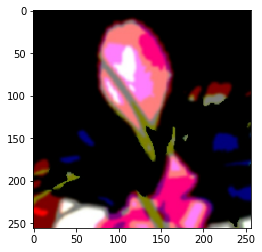

In [ ]:
plt.imshow(((Load_Train_Image(Rand_URLS[1])[0]) + 1) / 2)

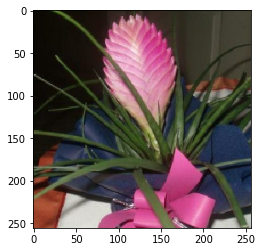

In [ ]:
# Llamar varias veces para ver que esté funcionando el Random_Jitter
plt.imshow(((Load_Train_Image(Rand_URLS[1])[1]) + 1) / 2)

In [6]:
# Input Pipeline
#   ■ En el paper indican que usan un tamaño de lote de 1
Batch_Size = 1

#   ■ Creando los generadores a través de la API de tf
train_dataset = tf.data.Dataset.from_tensor_slices(Training_URLS)
train_dataset = train_dataset.map(Load_Train_Image, num_parallel_calls = tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(Batch_Size)

test_dataset = tf.data.Dataset.from_tensor_slices(Testing_URLS)
test_dataset = test_dataset.map(Load_Test_Image, num_parallel_calls = tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(Batch_Size)

NameError: ignored

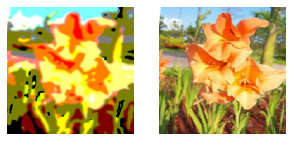

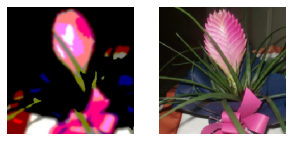

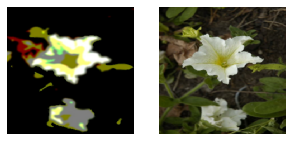

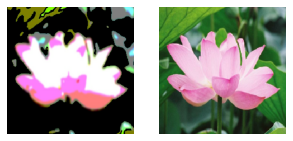

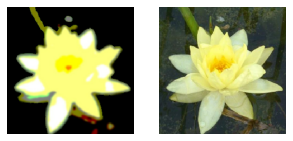

In [ ]:
for Initial, Target in train_dataset.take(5):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (5, 5))
  ax1.imshow(((Initial[0,...]) + 1) / 2)
  ax2.imshow(((Target[0,...]) + 1) / 2)
  ax1.axis("off"); ax2.axis("off")
  plt.show()

___

## 🔨 *Diseñando el Sistema $\texttt{Pix2Pix}$* 🔩

> La arquitectura del generador es una $\text{U-Net}$ modificada.
  + Cada bloque en el **codificador** es (<small>$\text{Conv2D} \rightarrow \text{BatchNormalization} \rightarrow \text{LeakyReLU}$</small>).
  + Cada bloque en el **decodificador** es (<small>$\text{Conv2DTranspose} \rightarrow \text{BatchNorm} \rightarrow \text{Dropout}$ (*aplicado a los primeros 3 bloques*) $\rightarrow \text{ReLU}$</small>).
  + Hay **conexiones de salto** entre el codificador y el descodificador (*como en $\text{U-Net}$*).

### Creación del Encoder

In [ ]:
from tensorflow.keras import *
from tensorflow.keras.layers import *

def downsample(filters, apply_batchnorm = True):
  initializer = tf.random_normal_initializer(0, 0.02) # (media, sd)
  result = Sequential()

  # Capa Convolucional
  result.add(Conv2D(filters,
                    kernel_size = 4,  # El tamaño de los filtros va a hacer 4x4
                    strides = 2,      # Cada vez que se da un paso se reduce el tamaño de la imagen a la 1/2
                    padding = "same", # Conservar el tamaño de los mapas de características
                    kernel_initializer = initializer,
                    use_bias = not apply_batchnorm # Detalle muyyy técnico
                    )
  )
  # Capa de Batch Normalization
  if apply_batchnorm:
    result.add(BatchNormalization())
  # Capa de Activación
  result.add(LeakyReLU())
  
  return result

In [ ]:
# Cada vez que ejecutemos esto nos estaría creando un minibloque que al pasarle
# los datos haría la Convolucion, Batch Normalization y la Activación
downsample(64)

In [ ]:
ExampleIn, ExampleOut = Load_Train_Image(Rand_URLS[1])[0], Load_Train_Image(Rand_URLS[1])[1]
DownModel  = downsample(filters = 6)
DownResult = DownModel(tf.expand_dims(ExampleIn, 0))
print(DownResult.shape)

(1, 128, 128, 6)


### Creación del Decoder

In [ ]:
def upsample(filters, apply_dropout = False):
  initializer = tf.random_normal_initializer(0, 0.02) # (media, sd)
  result = Sequential()
  
  # Capa Convolucional
  result.add(Conv2DTranspose(filters,
                             kernel_size = 4,
                             strides = 2,
                             padding = "same",
                             kernel_initializer = initializer,
                             use_bias = False # Nunca se utilice el parámetro de sesgo
                             )
  )
  # Capa de Batch Normalization
  result.add(BatchNormalization())
  # Capa de Dropout (para desconectar una serie de conexiones de manera aleatoria y sirve como elemento regularizador de la red)
  if apply_dropout:
    result.add(Dropout(0.5))
  # Capa de Activación
  result.add(ReLU())
  
  return result

In [ ]:
upsample(64)

In [ ]:
UpModel  = upsample(6)
UpResult = UpModel(DownResult)
print (UpResult.shape)
del DownModel, DownResult, UpModel, UpResult

(1, 256, 256, 6)


### Creación del modelo generador (capa U-NET)

In [ ]:
def Generator():
  # Especificando la capa de entrada
  inputs = tf.keras.layers.Input(shape = [None, None, 3]) # (Ancho, Alto, Canales de Color)
  
  # Declarando cada uno de los bloques que conformaran nuestra red
  #                 (los números salen del paper)
  
  # Control sobre las dimensiones de la imagen
  # Input -> (Batch Size, 256, 256, 3 RGB)
  down_stack = [
                downsample(64, apply_batchnorm = False), # (Batch Size, 256/2 = 128, 256/2 = 128, 64 Filtros)
                downsample(128),                         # (Batch Size, 128/2 = 64,  128/2 = 64,  64*2  = 128 Filtros)
                downsample(256),                         # (Batch Size, 64/2  = 32,  64/2  = 32,  128*2 = 256 Filtros)
                downsample(512),                         # (Batch Size, 32/2  = 16,  32/2  = 16,  256*2 = 512 Filtros)
                downsample(512),                         # (Batch Size, 16/2  = 8,   16/2  = 8,   512 Filtros)
                downsample(512),                         # (Batch Size, 8/2   = 4,   8/2   = 4,   512 Filtros)
                downsample(512),                         # (Batch Size, 4/2   = 2,   4/2   = 2,   512 Filtros)
                downsample(512),                         # (Batch Size, 2/2   = 1,   2/2   = 1,   512 Filtros)
  ]
  up_stack = [
              upsample(512, apply_dropout = True),       # (Batch Size, 1*2  = 2,   1*2  = 2,   512*2 = 1024 Filtros)
              upsample(512, apply_dropout = True),       # (Batch Size, 2*2  = 4,   2*2  = 4,   1024 Filtros)
              upsample(512, apply_dropout = True),       # (Batch Size, 4*2  = 8,   4*2  = 8,   1024 Filtros)
              upsample(512),                             # (Batch Size, 8*2  = 16,  8*2  = 16,  1024 Filtros)
              upsample(256),                             # (Batch Size, 16*2 = 32,  16*2 = 32,  512 Filtros)
              upsample(128),                             # (Batch Size, 32*2 = 64,  32*2 = 64,  256 Filtros)
              upsample(64),                              # (Batch Size, 64*2 = 128, 64*2 = 128, 128 Filtros)
  ]
  
  initializer = tf.random_normal_initializer(0, 0.02) # (media, sd)
  # Añadiendo la última capa, cuya función es generar la imagen final
  # El número de filtros que debería tener esta capa es lo que define el número de canales que tiene la imagen final
  last = Conv2DTranspose(filters = 3,
                         kernel_size = 4,
                         strides = 2,     # Para que duplique el tamaño anterior (128*2 = 256)
                         padding = "same",
                         kernel_initializer = initializer,
                         activation = "tanh"  # Nuestras imágenes vienen del rango [-1, 1] por lo cual tendría sentido
                         )                    # usar una función de activación cuyo dominio sea dicho intervalo
  
  x = inputs
  # Skip Connections (cogemos una capa del Encoder y la concatenamos al mismo nivel del Decoder)
  # Downsampling through the model
  skips = []
  # Conectando la red (conectando cada una de las capas del codificador [Encoder])
  for down in down_stack:
    x = down(x)
    skips.append(x)
  
  # El orden debe ser invertido, es decir, la última capa que hemos metido a nuestra lista debe ser la primera a ser concatenada en el Decoder
  #                                           [El último elemento no hace falta (cuello de botella)]
  skips = reversed(skips[:-1])
  # Conectando cada una de las capas del decodificador [Decoder]
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = Concatenate()([x, skip])

  # Toca retornar con este estilo al usar el modo funcional de Keras
  x = last(x)
  return Model(inputs = inputs, outputs = x)

Comprobando que el generador funcione.

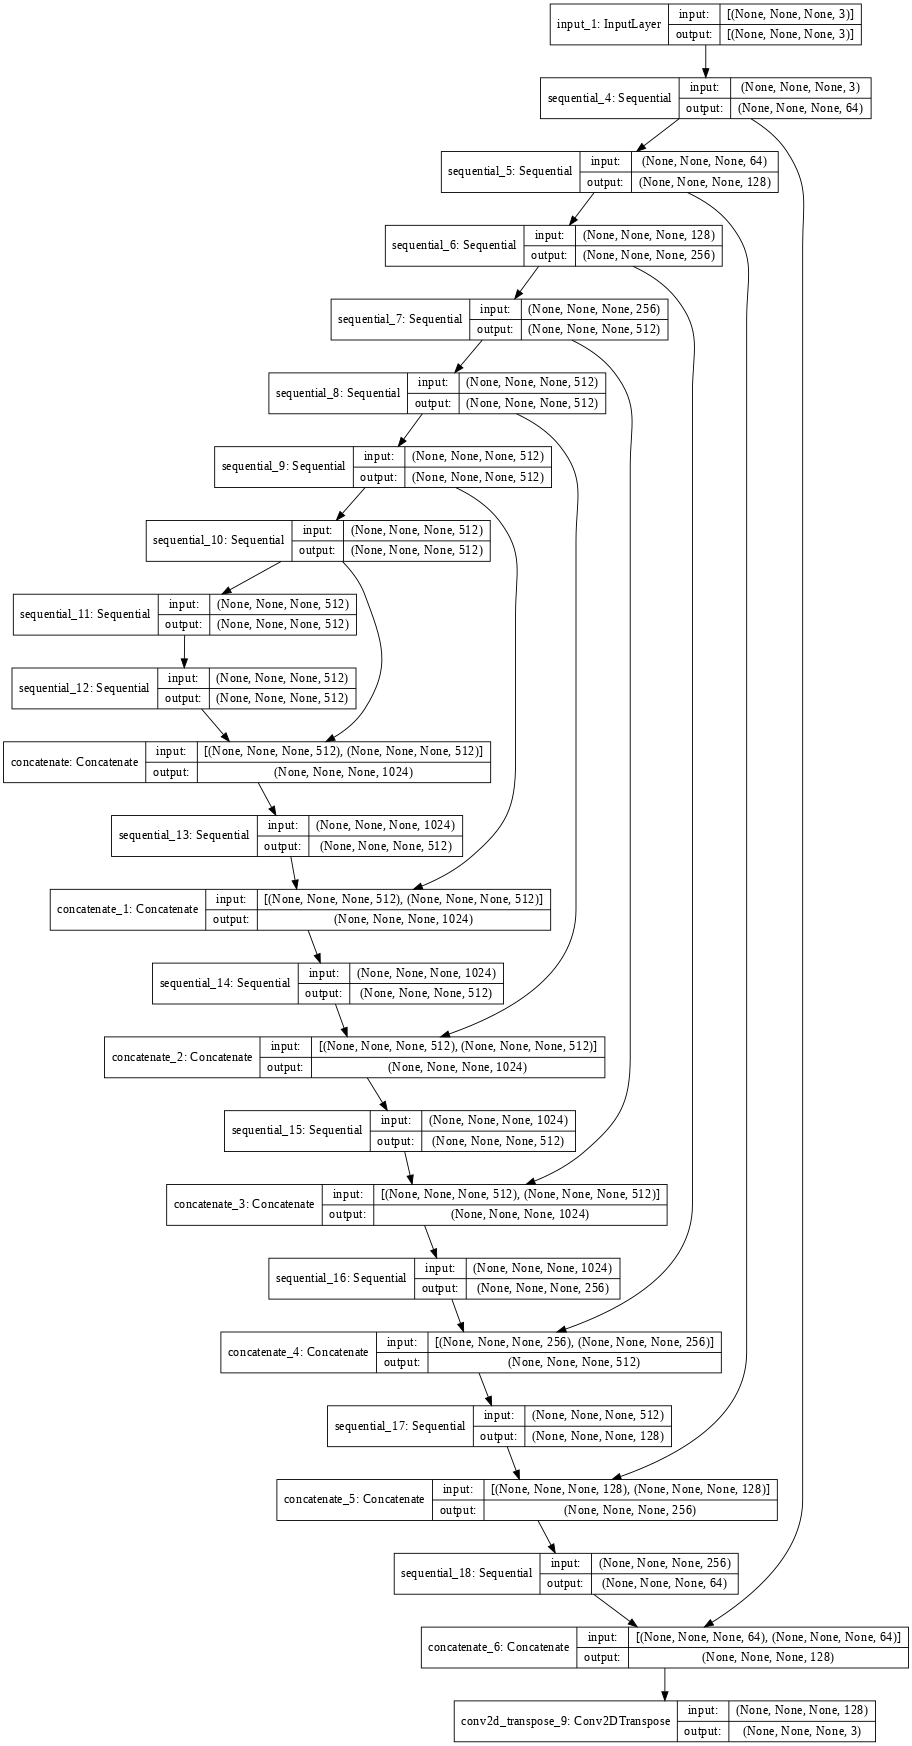

In [ ]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes = True, dpi = 64)

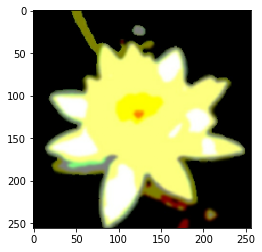

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


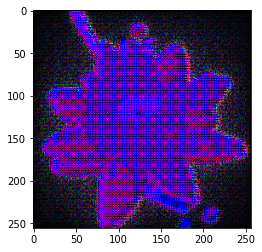

In [ ]:
Generator_Output = generator(((Initial+1)*255), training = False)
plt.imshow(((Initial[0,...]) + 1) /2)
plt.show()
# Como no ha sido entrenado nos genera basura, pero funciona y genera la imagen 256x256 con 3 canales de color
plt.imshow(Generator_Output[0,...])

### 🔍 Creación del discriminador ($\text{PatchGAN}$) ⚔️

> + Su tarea será la de observar el resultado del generador y decidir si el resultado es verdadero o falso (*respecto a lo que él considere que debería ser una imagen correcta*).
+ En lugar de utilizar un discriminador tradicional que retorna un escalar indicando si la imagen es cierta o falsa, lo que utilizaremos es un tipo de red llamada Patchgan, cuya diferencia es que en vez de llegar a un resultado final de un único valor lo que va a retornar es una cuadricula en donde se van a evaluar diferentes porciones (*parches*) de la imagen original.

In [ ]:
def Discriminator():
  # Tenemos dos inputs, ya que el discriminador tiene acceso tanto a la
  # imagen generada por el generador como a la imagen original
  ini = Input(shape = [None, None, 3], name = "input_img")
  gen = Input(shape = [None, None, 3], name = "gener_img")
  con = concatenate([ini, gen]) # Apilando las dos imágenes -> tensor de (Batch Size, 256, 256, Canales*2 = RGB*2 = 6)
  
  down1 = downsample(64, apply_batchnorm = False)(con)
  down2 = downsample(128)(down1)
  down3 = downsample(256)(down2)
  down4 = downsample(512)(down3)
  
  initializer = tf.random_normal_initializer(0, 0.2)
  last = tf.keras.layers.Conv2D(filters = 1,
                                kernel_size = 4,
                                strides = 1,
                                kernel_initializer = initializer,
                                padding = "same")(down4)
  return tf.keras.Model(inputs = [ini, gen], outputs = last)

Comprobando que el discriminador funcione.

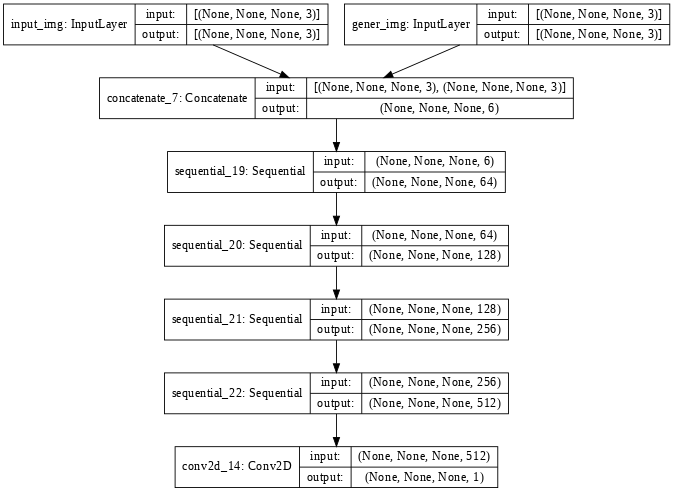

In [ ]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes = True, dpi = 64)

TensorShape([1, 16, 16, 1])

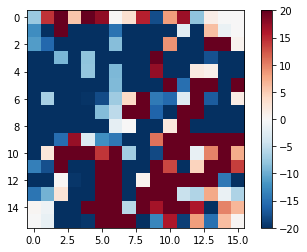

In [ ]:
Discriminador_Output = discriminator([((Initial+1)*255), Generator_Output], training = False)
plt.imshow(Discriminador_Output[0,...,-1], vmin = -20, vmax = 20, cmap = "RdBu_r")
plt.colorbar()
Discriminador_Output.shape

### 💲 Creación de la función de coste adversaria 💸

+ **Generator Loss**
  + La función de pérdida es la <u>entropía cruzada sigmoidal</u> de las imágenes generadas y una serie de imágenes.
  + El artículo también incluye la pérdida $\text{L1}$ que es <u>MAE</u> (*error absoluto medio*) entre la imagen generada y la imagen objetivo.
  + De acuerdo con los autores del articulo la fórmula para calcular la pérdida total del generador es $\text{gan_loss} + \lambda \bullet \text{l1_loss}$, donde $\lambda = 100$.

<center>
  <img src = "https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/gen.png?raw=1"
       alt    = "Generator Update Image"
       height = "520"
       title  = "Generator Update Image">
</center>

+ **Discriminator Loss**
  + La función de pérdida del discriminador toma $2$ entradas: <u>las imágenes reales y las imágenes generadas</u>.
  + $\text{real_loss}$ tiene como función de pérdida la entropía cruzada sigmoidal de las imágenes reales y una serie de imágenes (*ya que estas son las imágenes reales*).
  + $\text{generate_loss}$ tiene como función de pérdida la entropía cruzada sigmoidal de las imágenes generadas y una matriz de ceros (*ya que estas son imágenes falsas*).
  + Finalmente $\text{total_loss} = \text{real_loss}+\text{generated_loss}$.

<center>
  <img src = "https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/dis.png?raw=1"
       alt    = "Discriminator Update Image"
       height = "520"
       title  = "Discriminator Update Image">
</center>

In [ ]:
# Definición de los optimizadores.
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1 = 0.5)

# Calculando la entropía cruzada de cada uno de los px | from_logits = True -> las imágenes que
# obtenemos por entrada las normalizamos pasando por una función sigmoide [0, 1]
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits = True)

# ------------- EVALUACIÓN DEL DISCRIMINADOR -------------
def discriminator_loss(disc_real_output, disc_generated_output):
  # Diferencia entre los true por ser real y el detectado por el discriminador
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  # Diferencia entre los false por ser generado y el detectado por el discriminador
  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss
  return total_disc_loss

# ------------- EVALUACIÓN DEL GENERADOR -------------
LAMBDA = 100 # Parámetro de regularización
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Error Absoluto Medio (Mean Absolute Error)
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
  total_gen_loss = gan_loss + (LAMBDA*l1_loss)
  return total_gen_loss, gan_loss, l1_loss

### 🎯 Creación de funciones opcionales/auxiliares ⚠️

In [ ]:
# Checkpoint-Saver
Checkpoint_Prefix = os.path.join(Check_Path, "ckpt")
Checkpoint = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                                 discriminator_optimizer = discriminator_optimizer,
                                 generator = generator,
                                 discriminator = discriminator)

In [ ]:
def generate_images(model, test_input, tar, save_filename = False, display_imgs = True):
  prediction = model(test_input, training = True)
  if save_filename:
    tf.keras.preprocessing.image.save_img(Path + '/Predictions/' + save_filename + '.jpg', prediction[0,...])
  plt.figure(figsize = (10, 10))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ["Imagen Entrada", "Imagen Verdadera", "Imagen Predicha"]
  if display_imgs:
    for i in range(3):
      plt.subplot(1, 3, i+1)
      plt.title(title[i])
      # Obteniendo los valores de píxel entre [0, 1] para trazarlo.
      plt.imshow(display_list[i] * 0.5 + 0.5)
      plt.axis("off")
  plt.show()

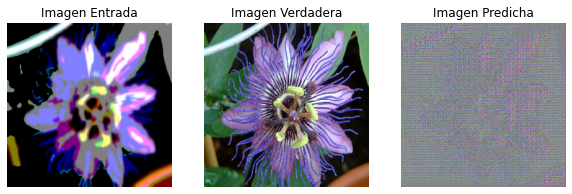

In [ ]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

## 🤹‍♀ *Definiendo Nuestra Rutina de Entrenamiento* 🏋

In [ ]:
import datetime
log_dir = "logs/"
Escribir_Resumen = tf.summary.create_file_writer(log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
@tf.function()
def train_step(input_image, target, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as discr_tape:
    output_image = generator(input_image, training = True)

    output_gen_discr = discriminator([output_image, input_image], training = True)
    output_trg_discr = discriminator([target, input_image], training = True)

    discr_loss = discriminator_loss(output_trg_discr, output_gen_discr)
    gen_loss, gen_gan_loss, gen_l1_loss = generator_loss(output_gen_discr, output_image, target)

    generator_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_grads = discr_tape.gradient(discr_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_grads, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_grads, discriminator.trainable_variables))

  with Escribir_Resumen.as_default():
    tf.summary.scalar("gen_total_loss", gen_loss,     step = epoch)
    tf.summary.scalar('gen_gan_loss',   gen_gan_loss, step = epoch)
    tf.summary.scalar('gen_l1_loss',    gen_l1_loss,  step = epoch)
    tf.summary.scalar('discr_loss',     discr_loss,   step = epoch)

In [ ]:
from IPython.display import clear_output
def fit(dataset, epochs):
  for epoch in range (epochs):
    start = time.time()
    i = 0
    for input_image, target in dataset:
      print("epoch" + str(epoch) + "-train:" + str(i) + "/" + str(len(Training_URLS)))
      train_step(input_image, target, epoch)
      clear_output(wait = True)
      i += 1
    print("El tiempo necesario para la época {} fue {} seg\n".format(epoch + 1, round(time.time()-start, 5)))
    j = 0
    for input, target in test_dataset.take(6):
      generate_images(generator, input, target, str(j) + "_" + str(epoch), display_imgs = True)
      j += 1
    # Guardando un checkpoint cada 20 épocas
    if (epoch + 1) % 20 == 0:
      Checkpoint.save(file_prefix = Checkpoint_Prefix)
  
  Checkpoint.save(file_prefix = Checkpoint_Prefix)

> El historial del ciclo de entrenamiento lo vamos a guarda usando $\text{TensorBoard}$ para monitorear el progreso del entrenamiento. Al estar trabajando en un notebook (*y no de forma local*) para supervisar con $\text{TensorBoard}$ es más fácil iniciar el visor antes de comenzar el entrenamiento.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [ ]:
Epocas = 500
fit(train_dataset, Epocas)

> Como deseamos compartir los resultados de $\text{TensorBoard}$ públicamente, debemos cargar los registros en $\text{TensorBoard.dev}$ corriendo la siguiente celda de código.

👁️ Observaciones: ⛔
  + Tenga presente que se requiere de una cuenta de $\text{Google}$).
  + Al ejecutar la celda le pedirá una verificación y **no** se finalizará, ya que está diseñado para cargar continuamente los resultados de experimentos de larga duración. Una vez que se cargan los datos, debe detenerlos usando la opción "*interrumpir la ejecución*".

In [ ]:
!tensorboard dev upload --logdir  {log_dir}

2021-06-09 02:24:39.133051: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&sco

+ Puede ver los resultados obtenidos abriendo el enlace creado o copiando dicho link en el siguiente código que incluye un $\text{<iframe>}$.

In [ ]:
display.IFrame(src = "https://tensorboard.dev/experiment/ltGqEV0XTgaDgOBJDYK9RA/", width = "100%", height = "1000px")

___

## *Resultados Finales*

In [ ]:
if os.path.isfile(Path + "Modelo.h5") is False:
  generator.save(filepath = Path + "Modelo.h5")

In [7]:
from tensorflow.keras.models import load_model
New_Model = load_model(filepath = Path + "Modelo.h5")
New_Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, None, None, 6 3136        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, None, None, 1 131584      sequential_4[0][0]               
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, None, None, 2 525312      sequential_5[0][0]               
______________________________________________________________________________________________

In [ ]:
for inp, tar in test_dataset.take(100):
  generate_images(New_Model, inp, tar)

Output hidden; open in https://colab.research.google.com to view.

Saving 1-21-6-1-15-20-53m.jpg to 1-21-6-1-15-20-53m (1).jpg
Archivo subido por el usuario "1-21-6-1-15-20-53m.jpg" con una longitud de 52511 bytes
['1-21-6-1-15-20-53m.jpg']


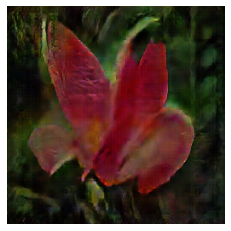

In [10]:
from google.colab import files
Dibujos = files.upload()

for fn in Dibujos.keys():
  print('Archivo subido por el usuario "{name}" con una longitud de {length} bytes'.format(name = fn, length = len(Dibujos[fn])))
print(list(Dibujos.keys()))

for i in Dibujos:
    TestImage = tf.cast(tf.image.decode_jpeg(tf.io.read_file(i)), tf.float32)[..., :3]
    Input_Img, Output_Img = Resize(TestImage, TestImage, Image_Height, Image_Width)
    Input_Img, Output_Img = Normalize(Input_Img, Output_Img)
    
    Draw = tf.reshape(Input_Img, [1, 256, 256, 3])
    Prediccion = New_Model(Draw, training = True)

    plt.imshow((Prediccion[0] + 1) / 2)
    plt.axis("off")
    plt.show()

In [ ]:
# Restaurando el último punto de control en Check_Path
!ls {"/content/drive/MyDrive/Colab\ Notebooks/DATA/PokemonDataset/Training_Checkpoints"}
Checkpoint.restore(tf.train.latest_checkpoint(Check_Path))
# Checkpoint.restore(tf.train.latest_checkpoint(Check_Path)).assert_consumed()

checkpoint		     ckpt-27.data-00000-of-00001
ckpt-10.data-00000-of-00001  ckpt-27.index
ckpt-10.index		     ckpt-28.data-00000-of-00001
ckpt-11.data-00000-of-00001  ckpt-28.index
ckpt-11.index		     ckpt-29.data-00000-of-00001
ckpt-12.data-00000-of-00001  ckpt-29.index
ckpt-12.index		     ckpt-2.data-00000-of-00001
ckpt-13.data-00000-of-00001  ckpt-2.index
ckpt-13.index		     ckpt-30.data-00000-of-00001
ckpt-14.data-00000-of-00001  ckpt-30.index
ckpt-14.index		     ckpt-31.data-00000-of-00001
ckpt-15.data-00000-of-00001  ckpt-31.index
ckpt-15.index		     ckpt-32.data-00000-of-00001
ckpt-16.data-00000-of-00001  ckpt-32.index
ckpt-16.index		     ckpt-33.data-00000-of-00001
ckpt-17.data-00000-of-00001  ckpt-33.index
ckpt-17.index		     ckpt-34.data-00000-of-00001
ckpt-18.data-00000-of-00001  ckpt-34.index
ckpt-18.index		     ckpt-35.data-00000-of-00001
ckpt-19.data-00000-of-00001  ckpt-35.index
ckpt-19.index		     ckpt-36.data-00000-of-00001
ckpt-1.data-00000-of-00001   ckpt-36.index
ckpt

In [ ]:
Checkpoint.restore(tf.train.latest_checkpoint(Check_Path)).assert_consumed()

In [ ]:
!pip install celluloid

In [ ]:
# !pip install celluloid
from celluloid import Camera

# https://stackoverflow.com/questions/4813061/non-alphanumeric-list-order-from-os-listdir
def Sorted_Windows(data):
  import re
  convert = lambda text: int(text) if text.isdigit() else text.lower()
  alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
  return sorted(data, key = alphanum_key)

def Timelapse(carpeta, flor, frames):
  fig, ax = plt.subplots()
  Camara = Camera(fig)
  for img in Sorted_Windows(os.listdir(carpeta)):
    if img[0] == str(flor):
      Image_Obj = plt.imread(carpeta + "/" + img)
      ax.imshow(Image_Obj)
      ax.text(0.5, 1.01, "Epoch=" + img[2:-4], style = "italic", color = "#EC2414",
              horizontalalignment = "center", transform = ax.transAxes)
      ax.axis("off")
      Camara.snap()
  return Camara.animate(interval = frames)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor 

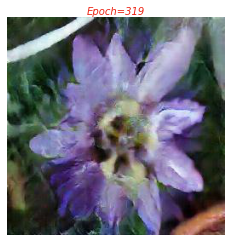

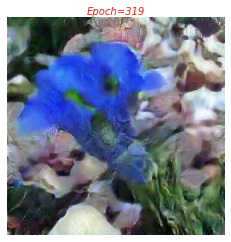

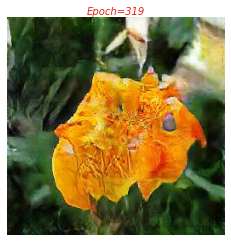

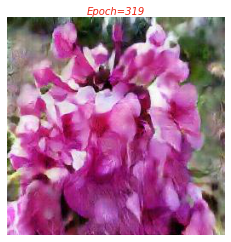

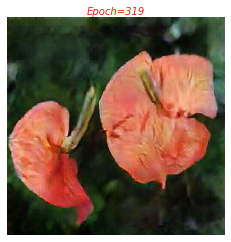

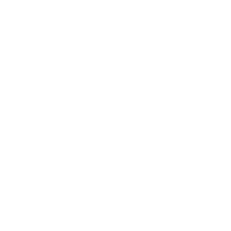

In [ ]:
Img_Dir = Path + "Predictions"
for i in range(6):
  Animacion = Timelapse(Img_Dir, i, 20)
  HTML(Animacion.to_html5_video())
  Animacion.save("Animacion" + str(i) + ".mp4", dpi = 500, savefig_kwargs = {"frameon": False, "pad_inches": "tight"})

___
___

# 📸**GENERACIÓN DE IMÁGENES 3D**💻

> Los autores han puesto a disposición de cualquiera su código con el fin de que pueda ser utilizado y que esta línea de investigación pueda seguir avanzando. El siguiente código permitir convertir tus imágenes en vídeos con profundidad 3D, es el trabajo resultante de un proyecto de investigación desarrollado [por estos autores](https://shihmengli.github.io/3D-Photo-Inpainting/). Se trata de un proyecto de **machine learning** que usando avanzados algoritmos de visión por ordenador consigue automáticamente calcular la profundidad 3D de tu escena, y sintetizar los posibles huecos que al mover la cámara surjan. **todo automáticamente y sin intervención humana.**


  + 1️⃣ La siguiente celda de código instala todas las librerías necesarias para hacer funcionar al sistema, y también descargará de $\text{GitHub}$ el proyecto, por lo tanto, tardará un poco (*entre 3-4 minutos*).

In [ ]:
# Preparación del entorno.
!pip3 install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install opencv-python==4.2.0.32
!pip3 install vispy==0.6.4
!pip3 install moviepy==1.0.2
!pip3 install transforms3d==0.3.1
!pip3 install networkx==2.3
!sudo apt install sed

# Descarga y configuración del modelo preentrenado.
%cd /content/
!git clone https://github.com/vt-vl-lab/3d-photo-inpainting.git
%cd 3d-photo-inpainting
!sh download.sh
!sed -i 's/offscreen_rendering: True/offscreen_rendering: False/g' argument.yml

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Reading package lists... Done
Building dependency tree       
Reading state information... Done
sed is already the newest version (4.4-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/content
fatal: destination path '3d-photo-inpainting' already exists and is not an empty directory.
/content/3d-photo-inpainting
mkdir: cannot create directory ‘checkpoints’: File exists
downloading from filebox ...
--2021-08-10 12:02:59--  https://filebox.ece.vt.edu/~jbhuang/project/3DPhoto/model/color-model.pth
Resolving filebox.ece.vt.edu (filebox.ece.vt.edu)... 128.173.88.43
Connecting to filebox.ece.vt.edu (filebox.ece.vt.edu)|128.173.88.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206331633 (197M)
Saving to: ‘color-model.pth’

color-model.pth     100%[===================>] 196.77M  40.3MB/s    in 5.5s    

2021-08-10 12:03:05 (35.6 MB/s) - ‘color-model.pth’ saved [206331633/206331

  + 2️⃣ Ahora realizaremos la subida de las imágenes que deseas convertir a 3D, para ello realizaremos dos tareas:
    + Si ya has probado el código con anterioridad o deseas eliminar las imágenes que viene por defecto en el proyecto es remendable limpiar el espacio de trabajo.
    + Luego aparecerá un botón de "Elegir archivos" para que elijas tus imágenes de forma local, finalizara con un mensaje de texto indicando que se subieron correctamente.
    ```
    Saving Mi_Imagen.jpg to Mi_Imagen.jpg
    ```

</br>

🔰 Importante: comprueba que la extensión de las imágenes que subas estén en formato $\text{.jpg}$ (no válido $\text{.jpeg}$, $\text{.png}$, ...).

⚠️ Evita subir imágenes de gran tamaño y/o resolución, ya que el sistema podría fallar 🧨💢.


In [ ]:
# Borrar imágenes subidas anteriormente y por defecto.
!rm /content/3d-photo-inpainting/image/*

In [ ]:
# Carga de las imágenes.
!rm /content/3d-photo-inpainting/image/moon.jpg

%cd image
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Archivo subido por el usuario "{name}" con una longitud de {length} bytes'.format(name = fn, length = len(uploaded[fn])))
%cd ..

rm: cannot remove '/content/3d-photo-inpainting/image/moon.jpg': No such file or directory
/content/3d-photo-inpainting/image


Saving 4_319.jpg to 4_319.jpg
Archivo subido por el usuario "4_319.jpg" con una longitud de 11330 bytes
/content/3d-photo-inpainting


  + 3️⃣ Con las imágenes subidas realizaremos el procesamiento de éstas. No se preocupe si se toma su 🕓tiempo⏲️ al ejecutar la celda pues éste toma alrededor de $5$ minutos por imágenes (*debe aplicar 4 efectos distintos a cada imangen*).

In [ ]:
!rm /content/3d-photo-inpainting/video/*
!rm /content/3d-photo-inpainting/depth/*
!rm /content/3d-photo-inpainting/mesh/*
!python main.py --config argument.yml

rm: cannot remove '/content/3d-photo-inpainting/video/*': No such file or directory
rm: cannot remove '/content/3d-photo-inpainting/depth/*': No such file or directory
rm: cannot remove '/content/3d-photo-inpainting/mesh/*': No such file or directory
running on device 0
  0% 0/1 [00:00<?, ?it/s]Current Source ==>  4_319
Running depth extraction at 1628597050.1586328
device: cuda
Namespace(Final=True, R0=False, R20=False, colorize_results=False, data_dir='inputs/', depthNet=0, max_res=inf, net_receptive_field_size=None, output_dir='outputs', output_resolution=1, pix2pixsize=1024, savepatchs=0, savewholeest=0)
----------------- Options ---------------
                    Final: True                          	[default: False]
                       R0: False                         
                      R20: False                         
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./pix2pi

  + 4️⃣ Finalmente, una vez se hayan procesado las imágenes, obtendrá una previsualización de los vídeos generados y podrás ir descargándolos uno a uno clickando en el botón de descarga. Recuerde que por cada imagen se obtendrá $4$ vídeos con diferentes técnicas de cámara (**Circle**, **Dolly Zoom**, **Swing** y **Zoom-in**).

In [ ]:
from google.colab    import output
from base64          import b64encode
import uuid
import copy

video_path = "/content/3d-photo-inpainting/video/"
urls = !ls -1 "/content/3d-photo-inpainting/video/"
urls = [item.replace("'", "") for item in urls]
urls

class InvokeButton(object):
  def __init__(self, title, callback):
    self._title = title
    self._callback = callback

  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)

    template = """<button id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title = self._title, callback_id = callback_id)
    return str(html)

for idx, url in enumerate(urls):
  mp4 = open(video_path + url, "rb").read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  display(InvokeButton(str((idx+1)) + "/" + str(len(urls)) + " ⬇ Descargar '" + url + "'", lambda u=url: files.download(video_path + u)))
  display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % (data_url)))

___
___

# **MODELO EDSR**

In [ ]:
import os
Path = "/content/drive/MyDrive/Colab Notebooks/Proyecto_EDSR/"
model_dir = "model"
os.makedirs(model_dir, exist_ok = True)

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Proyecto_EDSR/utils.py" "utils.py"
!cp "/content/drive/MyDrive/Colab Notebooks/Proyecto_EDSR/model/common.py" "model/common.py"

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Proyecto_EDSR/data.py" "data.py"
import data

## *Súper resolución con redes neuronales profundas*


El problema de súper resolución consiste basicamente en tomar una imagen en baja resolucion (LR low resolution) y reescalarla de tal manera que obtenemos como salida una imagen en alta resolucion (HR higth resolution). A lo largo del desarrollo de las redes neuronales utilizadas para resolver dicho problema se presenta SRResNet que emplea la arquitectura ResNet, la cual resolivio el problema de súper resolucion ademas de resolver problemas de tiempo y memoria con las que lidiaban algunas redes que intentaron resolver el problema ademas de un buen rendimiento. Sin embargo se considera que la arquitectura ResNet es subóptima para este problema por lo que basados en esto se construye una nueva arquitectura eliminando algunos modulos innecesarios construyendose asi EDSR.


<center>
  <img src = "http://krasserm.github.io/img/2019-09-04/figure_5.png"
       alt    = "comparacion arquitectura"
       title  = " Diseño de bloque residual en ResNet (izquierda) y en EDSR (derecha).">
</center>
<center>Diseño de bloque residual en ResNet (izquierda) y en EDSR (derecha).</center>

## *EDSR*

Para solucionar dicho problema se utilizara en este caso la arquitectura EDSR (Enhanced Deep Residual Networks for Single Image Super-Resolution) la cual, como se menciono anteriormente,  es una red basada en la arquitectura ResNet en la cual solo se tienen en cuanta los bloques residuales y las capas de muetreo superior eliminando asi la normalizacion por bloque y la capa de activacion final ReLU.


<center>
  <img src = "http://krasserm.github.io/img/2019-09-04/figure_4.png"
       alt    = "EDSR arquitectura"
       title  = "EDSR arquitectura">
</center>
<center>EDSR arquitectura.</center>

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Add, Conv2D, Input, Lambda
from tensorflow.keras.models import Model

DIV2K_RGB_MEAN = np.array([0.4488, 0.4371, 0.4040]) * 255

### Definicion de la capa de bloque residual compuesta por dos capas 
### convolucionales con la funcion de activacion relu

def res_block(x_in, filters, scaling):
    """Creates an EDSR residual block."""
    x = Conv2D(filters, 3, padding='same', activation='relu')(x_in)
    x = Conv2D(filters, 3, padding='same')(x)
    if scaling:
        x = Lambda(lambda t: t * scaling)(x)
    x = Add()([x_in, x])
    return x

## Definicion de la capa de muetreo superior que permite mediante convoluciones
## recontruir la imagen de manera que se va aumentando la informacion de esta

def upsample(x, scale, num_filters):
    def upsample_1(x, factor, **kwargs):
        """Sub-pixel convolution."""
        x = Conv2D(num_filters * (factor ** 2), 3, padding='same', **kwargs)(x)
        return Lambda(pixel_shuffle(scale=factor))(x)

    if scale == 2:
        x = upsample_1(x, 2, name='conv2d_1_scale_2')
    elif scale == 3:
        x = upsample_1(x, 3, name='conv2d_1_scale_3')
    elif scale == 4:
        x = upsample_1(x, 2, name='conv2d_1_scale_2')
        x = upsample_1(x, 2, name='conv2d_2_scale_2')
        
    return x

def pixel_shuffle(scale):
    return lambda x: tf.nn.depth_to_space(x, scale)

def normalize(x):
    return (x - DIV2K_RGB_MEAN) / 127.5

def denormalize(x):
    return x * 127.5 + DIV2K_RGB_MEAN

In [ ]:
def edsr(scale, num_filters=64, num_res_blocks=8, res_block_scaling=None):
    """Creates an EDSR model."""
    x_in = Input(shape=(None, None, 3))
    x = Lambda(normalize)(x_in)

    x = b = Conv2D(num_filters, 3, padding='same')(x)
    for i in range(num_res_blocks):
        b = res_block(b, num_filters, res_block_scaling)
    b = Conv2D(num_filters, 3, padding='same')(b)
    
    x = Add()([x, b])

    x = upsample(x, scale, num_filters)
    x = Conv2D(3, 3, padding='same')(x)

    x = Lambda(denormalize)(x)
    return Model(x_in, x, name="edsr")

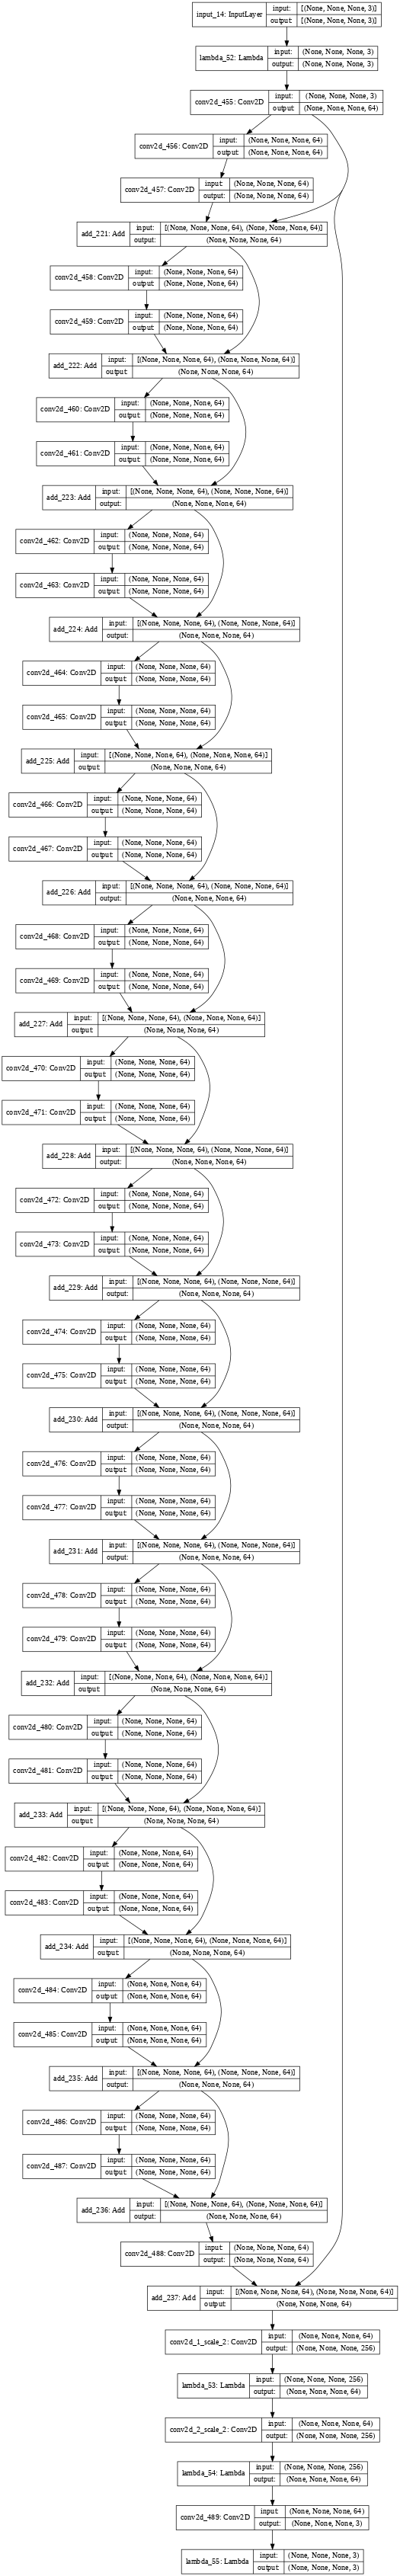

In [ ]:
import os
tf.keras.utils.plot_model(edsr(scale=4, num_res_blocks=16), show_shapes = True, dpi = 50)

## *Conjuto de Datos*

A continuacion se encuentra el conjunto de datos con el cual se llevara acabo el entrenamiento, DIV2K es un un conjunto con datos de gran variedad en donde se encuentran pares de imagenes LR y HR las imagenes LR se obtienen apartir de una reduccion *Bicubic*. Luego se tienen entonces 800 imagenes para el conjunto de entrenamiento y 100 para el conjunto de validacion, a las cuales se le aplican recortes aleatorios, giros y rotaciones con el fin de aumentar la cantidad datos. La funcion **DIV2K** en el modulo **data** proporciona los datos en pares de imagenes LR y HR del conjunto DIV2K en formato *tf.data.Dataset.*


In [ ]:
from data import DIV2K
train = DIV2K(scale=4, downgrade='bicubic', subset='train')
train_ds = train.dataset(batch_size=16, random_transform=True)

246915072/246914039 [==============================] - 14s 0us/step
Caching decoded images in .div2k/caches/DIV2K_train_LR_bicubic_X4.cache ...
Cached decoded images in .div2k/caches/DIV2K_train_LR_bicubic_X4.cache.
3530604544/3530603713 [==============================] - 191s 0us/step
Caching decoded images in .div2k/caches/DIV2K_train_HR.cache ...
Cached decoded images in .div2k/caches/DIV2K_train_HR.cache.


In [ ]:
from data import DIV2K
valid = DIV2K(scale=4, subset='valid', downgrade='bicubic')
valid_ds = valid.dataset(batch_size=16, random_transform=True, repeat_count=1)

31506432/31505881 [==============================] - 3s 0us/step
Caching decoded images in .div2k/caches/DIV2K_valid_LR_bicubic_X4.cache ...
Cached decoded images in .div2k/caches/DIV2K_valid_LR_bicubic_X4.cache.
448995328/448993893 [==============================] - 25s 0us/step
Caching decoded images in .div2k/caches/DIV2K_valid_HR.cache ...
Cached decoded images in .div2k/caches/DIV2K_valid_HR.cache.


## *Entrenamiento del Modelo*

In [ ]:
import os

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay

# Crear directorio para guardar los pesos del modelo
weights_dir = Path + 'weights_colab'
os.makedirs(weights_dir, exist_ok=True)

In [ ]:
# base lineal EDSR como se describe en el articulo
model_edsr = edsr(scale=4, num_res_blocks=16)

# Optimizador de Adam con un programador que reduce a la mitad la tasa de aprendizaje después de 7.500 pasos
optim_edsr = Adam(learning_rate=PiecewiseConstantDecay(boundaries=[5000], values=[1e-4, 5e-5]))

In [ ]:
# Compile y entrene el modelo para 10000 pasos con pérdida de píxeles L1
model_edsr.compile(optimizer=optim_edsr, loss='mean_absolute_error')
model_edsr.fit(train_ds, epochs=10, steps_per_epoch=50)

# Guardar los pesos del modelo
model_edsr.save_weights(os.path.join(weights_dir, 'weights-edsr-16-x4.h5'))

Epoch 1/10
50/50 [==============================] - 163s 3s/step - loss: 16.0557
Epoch 2/10
50/50 [==============================] - 158s 3s/step - loss: 14.3130
Epoch 3/10
50/50 [==============================] - 149s 3s/step - loss: 12.3424
Epoch 4/10
50/50 [==============================] - 196s 4s/step - loss: 12.3220
Epoch 5/10
50/50 [==============================] - 196s 4s/step - loss: 11.4899
Epoch 6/10
50/50 [==============================] - 196s 4s/step - loss: 10.9914
Epoch 7/10
50/50 [==============================] - 196s 4s/step - loss: 10.7347
Epoch 8/10
50/50 [==============================] - 196s 4s/step - loss: 10.0562
Epoch 9/10
50/50 [==============================] - 196s 4s/step - loss: 9.9928
Epoch 10/10
50/50 [==============================] - 197s 4s/step - loss: 9.7383


In [ ]:
model_edsr.summary()

Model: "edsr"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
_______________________________________________________________________________________________

In [ ]:
model_edsr.evaluate(valid_ds)

7/7 [==============================] - 26s 4s/step - loss: 9.5749


9.574909210205078

## *Pixel Loss*

Se utiliza la funcion de perdidad de pixeles la cual corresponde a el error absoluto medio entre la imagen en alta resolucion (valor observado) y la imagen de super resolucion (valor predicho) 

  \begin{align*}
  \mathcal{L}_{pixel, L^1}(I^{HR}, I^{SR}) &= {1 \over {HWC}}
  \lVert I^{HR} - I^{SR} \rVert
  \end{align*}

Donde $H$, $W$ y $C$ son el alto, ancho y numero de canales de la imagen, respectivamente.

## *Resultados*


In [ ]:
from model.common import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(model,lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)

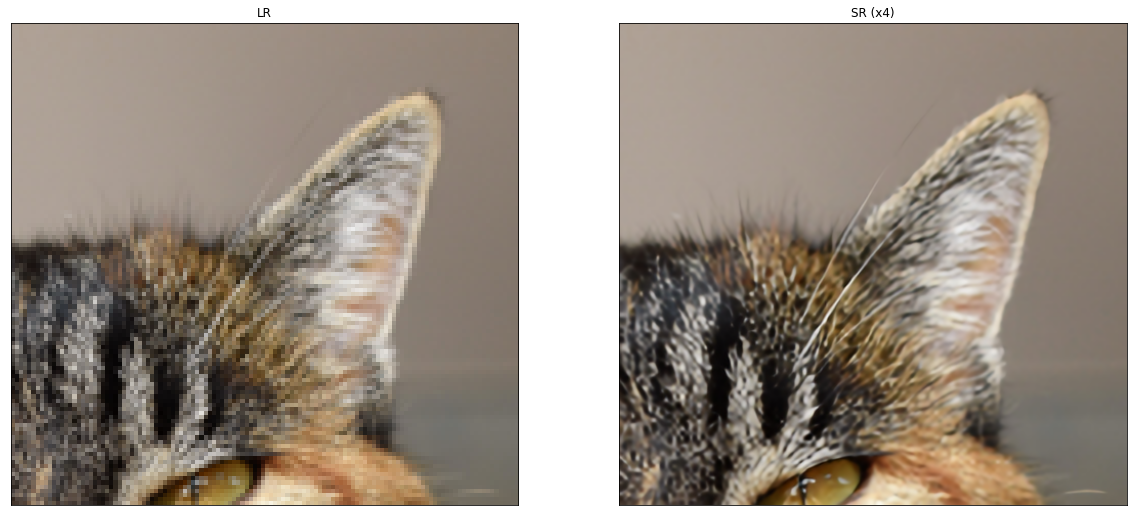

In [ ]:
weights_dir_art = '/content/drive/MyDrive/Colab Notebooks/Proyecto_EDSR/weights_art'
edsr_pre_trained = edsr(scale=4, num_res_blocks=16)
edsr_pre_trained.load_weights(os.path.join(weights_dir_art, 'weights-edsr-16-x4.h5'))

resolve_and_plot(edsr_pre_trained,Path + 'demo/0869x4-crop.png')

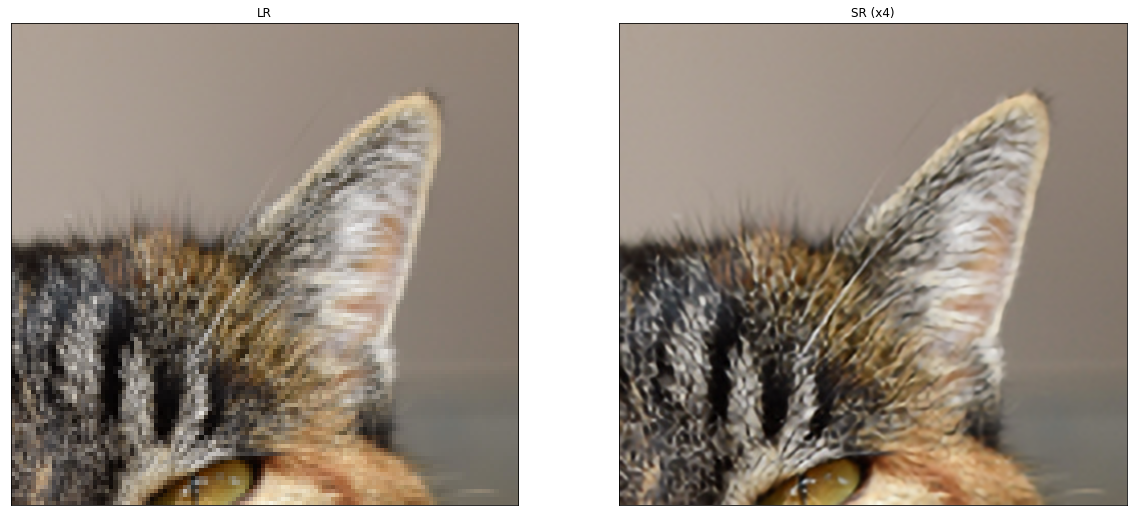

In [ ]:
#weights_dir_art = '/content/drive/MyDrive/Colab Notebooks/Proyecto_EDSR/weights_art'
edsr_pre_trained = edsr(scale=4, num_res_blocks=16)
edsr_pre_trained.load_weights(os.path.join(weights_dir, 'weights-edsr-16-x4.h5'))

resolve_and_plot(edsr_pre_trained,Path + 'demo/0869x4-crop.png')

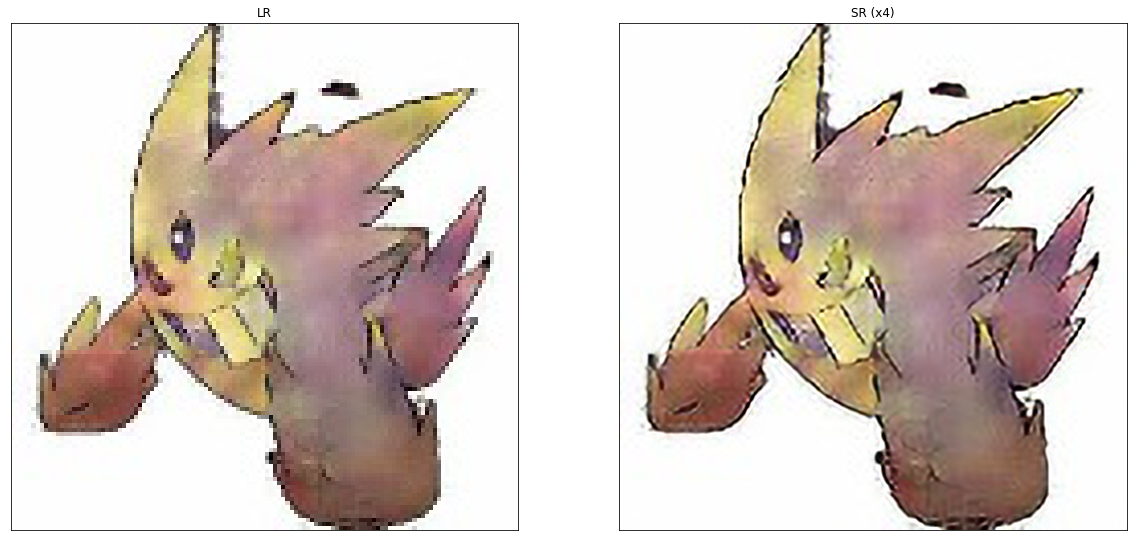

In [ ]:
weights_dir="/content/drive/MyDrive/Colab Notebooks/Proyecto_EDSR/weights"
edsr_pre_trained = edsr(scale=4, num_res_blocks=16)
edsr_pre_trained.load_weights(os.path.join(weights_dir, 'weights-edsr-16-x4.h5'))

resolve_and_plot(edsr_pre_trained, Path + 'demo/unnamed3.png')

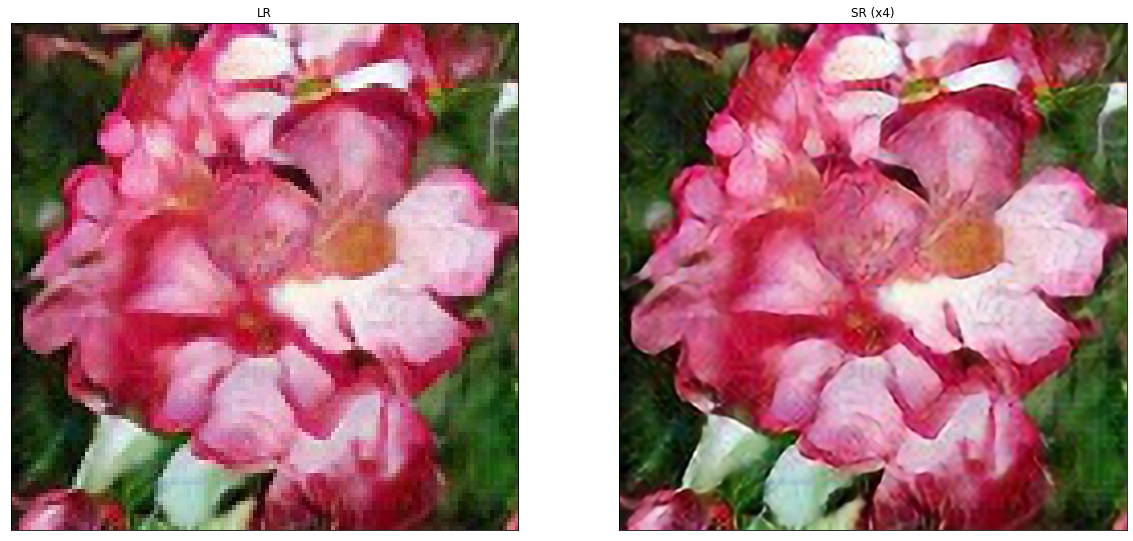

In [ ]:
edsr_pre_trained = edsr(scale=4, num_res_blocks=16)
edsr_pre_trained.load_weights(os.path.join(weights_dir, 'weights-edsr-16-x4.h5'))

resolve_and_plot(edsr_pre_trained, Path + 'demo/florinput4.png')